In [2]:
import pandas as pd


df = pd.read_csv('CONTENT_INTERACTION/ViewingActivity.csv')

In [3]:
%matplotlib inline
import matplotlib

In [4]:
df.head(1)
list(df.columns)

['Profile Name',
 'Start Time',
 'Duration',
 'Attributes',
 'Title',
 'Supplemental Video Type',
 'Device Type',
 'Bookmark',
 'Latest Bookmark',
 'Country']

In [5]:
df_jack = df[df['Profile Name'] == "Jack"]

In [6]:
df_jack.head(1)
#df_jack.dtypes

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
7011,Jack,2022-09-26 20:36:05,00:00:05,Autoplayed: user action: None;,I AM A KILLER: Season 1_hook_03_16x9,HOOK,Roku Fruitland Sound Bar,00:00:05,00:00:05,GB (United Kingdom)


In [7]:
df_jack['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df_jack['Duration'] = pd.to_timedelta(df['Duration'])
#df_jack.dtypes
df_jack = df_jack.set_index('Start Time')
df_jack.index = df_jack.index.tz_convert('Europe/London')
df_jack = df_jack.reset_index()
#df_jack.head(2)


C:\Users\jackk\AppData\Local\Temp\ipykernel_30396\3102245785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jack['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
C:\Users\jackk\AppData\Local\Temp\ipykernel_30396\3102245785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jack['Duration'] = pd.to_timedelta(df['Duration'])


In [8]:
df_jack.dtypes

Start Time                 datetime64[ns, Europe/London]
Profile Name                                      object
Duration                                 timedelta64[ns]
Attributes                                        object
Title                                             object
Supplemental Video Type                           object
Device Type                                       object
Bookmark                                          object
Latest Bookmark                                   object
Country                                           object
dtype: object

# Watch Times

In [231]:
watch_times = df_jack

In [232]:
watch_times['weekday'] = watch_times['Start Time'].dt.weekday
watch_times['hour'] = watch_times['Start Time'].dt.hour

<AxesSubplot:title={'center':'Number of Shows Watched by Day'}>

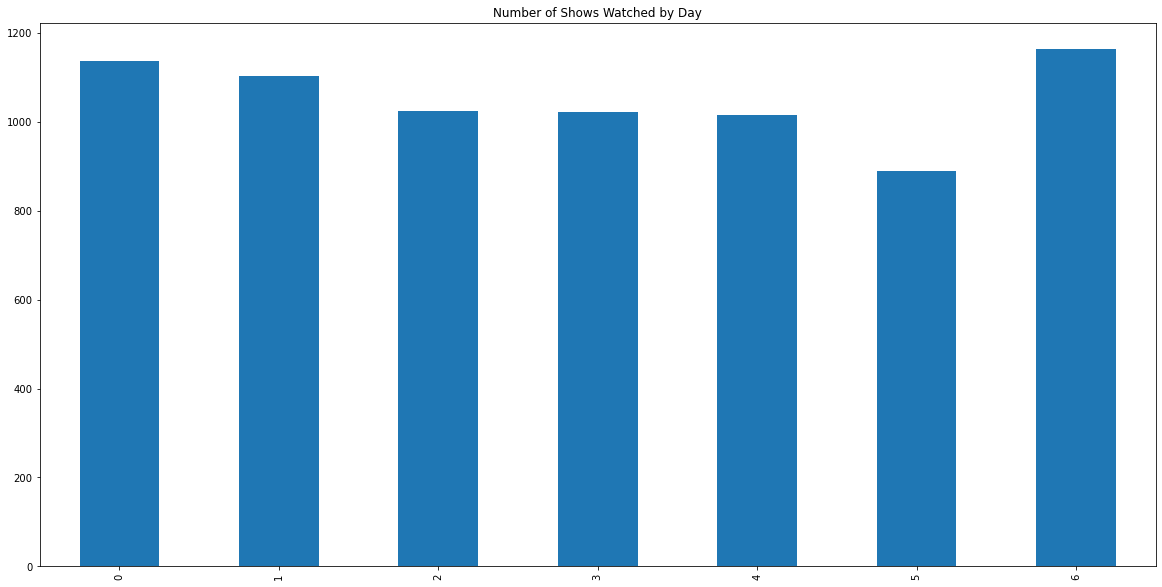

In [233]:
#Ordering the weekday Monday-Sunday
watch_times['weekday'] = pd.Categorical(watch_times['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
#New variable containing count of rows
watch_times_by_day = watch_times['weekday'].value_counts()
#Sort the counts by defined order
watch_times_by_day = watch_times_by_day.sort_index()
#plot data
watch_times_by_day.plot(kind='bar', figsize=(20,10),title='Number of Shows Watched by Day')

Text(0, 0.5, 'Duration (mins)')

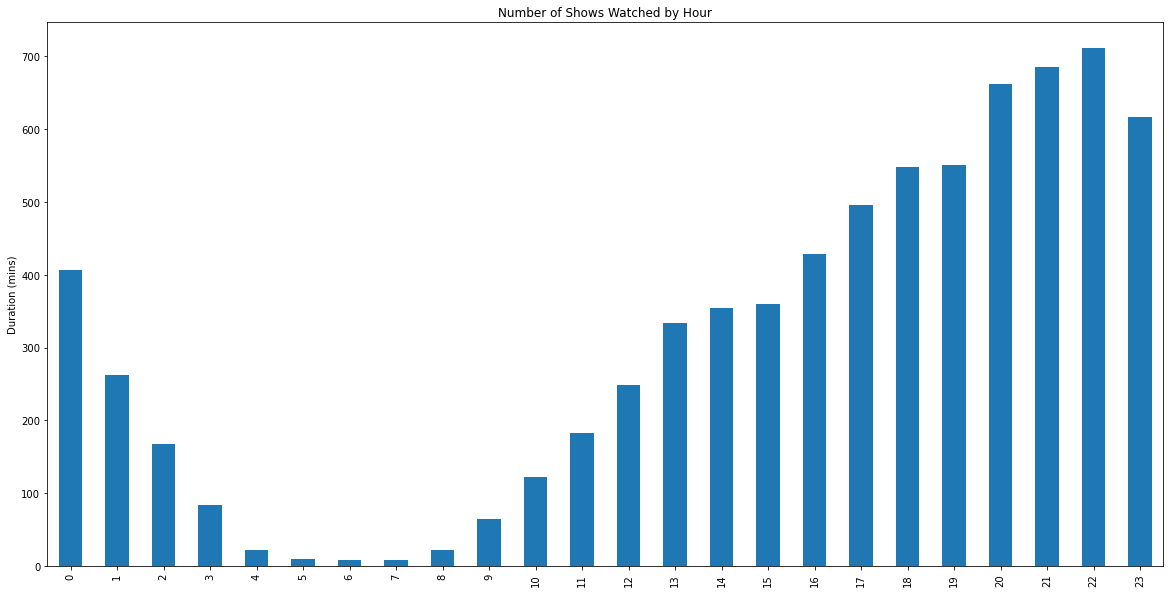

In [248]:
#Ordering the weekday 0-24
watch_times['hour'] = pd.Categorical(watch_times['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
#New variable containing count of rows
watch_times_by_hour = watch_times['hour'].value_counts()
#Sort the counts by defined order
watch_times_by_hour = watch_times_by_hour.sort_index()
#plot data
watch_times_by_hour_plot = watch_times_by_hour.plot(kind='bar', figsize=(20,10),title='Number of Shows Watched by Hour')
watch_times_by_hour_plot.set_ylabel("Duration (mins)")

Text(0, 0.5, 'Duration (mins)')

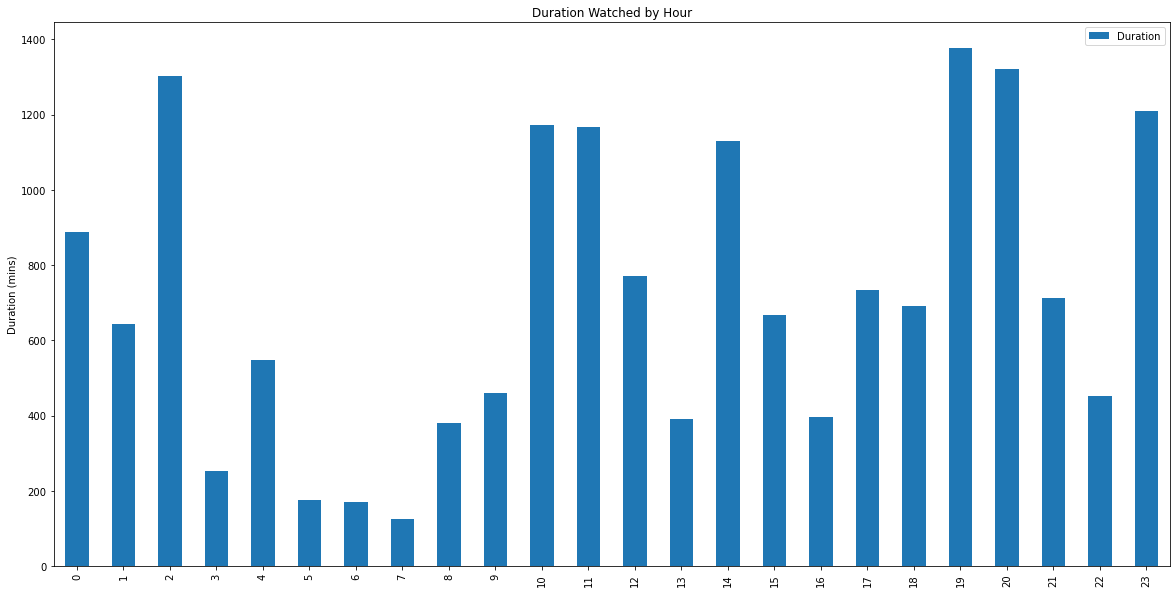

In [249]:
hours = [ i for i in range(24)]

data = []
for i in range(len(hours)):
    data.append([df_jack.loc[df_jack['hour'] == hours[i], 'Duration'].sum().seconds/60])

daily_duration =pd.DataFrame(data, columns=['Duration'])
daily_duration_plot = daily_duration.plot(kind='bar', figsize=(20,10),title='Duration Watched by Hour')
daily_duration_plot.set_ylabel("Duration (mins)")


Text(0, 0.5, 'Duration (mins)')

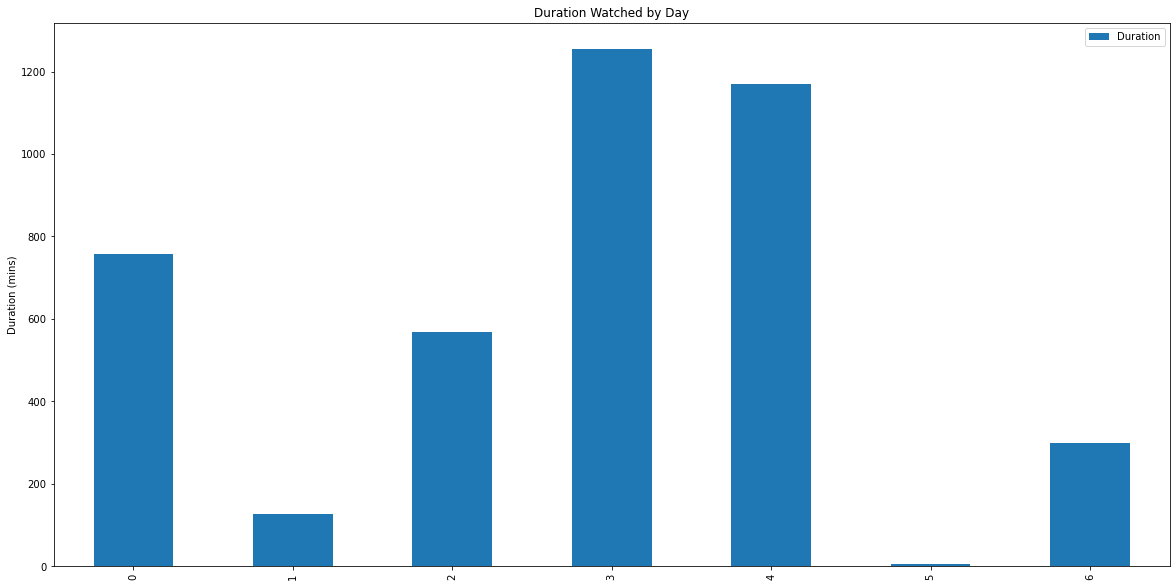

In [251]:
day = [ i for i in range(7)]

data = []
for i in range(len(day)):
    data.append([df_jack.loc[df_jack['weekday'] == day[i], 'Duration'].sum().seconds/60])

day_duration =pd.DataFrame(data, columns=['Duration'])
day_duration_plot = day_duration.plot(kind='bar', figsize=(20,10),title='Duration Watched by Day')
day_duration_plot.set_ylabel("Duration (mins)")

# The Office (U.S)

In [9]:
# only the rows in which the Title column contains 'The Office (U.S.)'
office_jack = df_jack[df_jack['Title'].str.contains('The Office (U.S.)', regex=False)]

In [10]:
office_jack.shape
office_jack = office_jack[(office_jack['Duration'] > '0 days 00:01:00')]

In [11]:
#Add new columns that contains weekday and hour
office_jack['weekday'] = office_jack['Start Time'].dt.weekday
office_jack['hour'] = office_jack['Start Time'].dt.hour
office_jack.head(1)


,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,weekday,hour
19,2022-09-21 20:06:05+01:00,Jack,0 days 00:15:28,NaN,The Office (U.S.): Season 8: Lotto (Episode 3),NaN,Roku Fruitland Sound Bar,00:15:28,00:15:28,GB (United Kingdom),2,20


<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

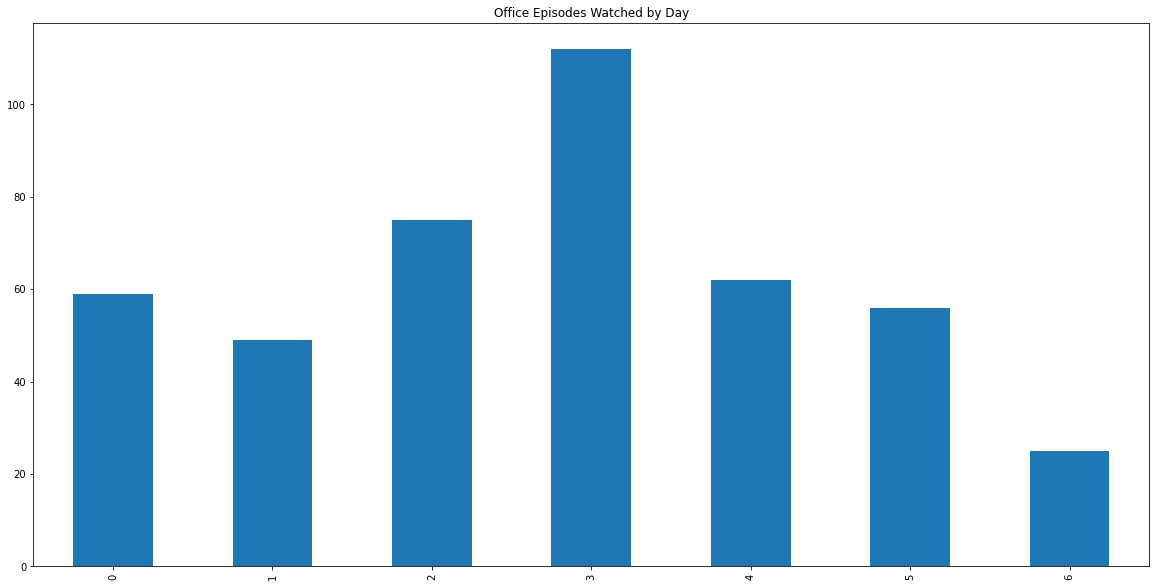

In [12]:
#Ordering the weekday Monday-Sunday
office_jack['weekday'] = pd.Categorical(office_jack['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
#New variable containing count of rows
office_jack_by_day = office_jack['weekday'].value_counts()
#Sort the counts by defined order
office_jack_by_day = office_jack_by_day.sort_index()
#plot data
office_jack_by_day.plot(kind='bar', figsize=(20,10),title='Office Episodes Watched by Day')

In [17]:
p_time_office = office_jack['Duration'].sum()/df_jack['Duration'].sum() * 100
print("The office has been watched for " + str(office_jack['Duration'].sum()) + " , which is " + str(round(p_time_office,2)) + "% of total watch time.")

The office has been watched for 5 days 18:13:15 , which is 5.1% of total watch time.


# Devices Used

In [59]:
devices_used = df_jack['Device Type'].unique()


In [60]:
print(devices_used)

['Roku Fruitland Sound Bar' 'Apple iPhone 11' 'Vestel MB211 Smart TV'
 'iPad Pro 9.7-Inch (Wi-Fi)' 'Firefox PC (Cadmium)' 'Chrome PC (Cadmium)'
 'Samsung 2017 Kant-M UHD TV Smart TV'
 'TiVo TiVo Virgin Media Series 6 MVPD STB' 'Apple TV 3 (revised)'
 'Safari MAC (Cadmium)' 'Google Chromecast V5 Streaming Stick'
 'Apple iPhone 7 (GSM)' 'Apple iPad 6th Gen 9.7 (Wi-Fi) iPad'
 'Microsoft Xbox One S' 'LG 2015 Mstar Low UHD TV'
 'TiVo Virgin Media Samsung DVR Set Top Box' 'Netflix Opera Other'
 'Youview British Telecom DTR-T2100 Set Top Box'
 'Android DefaultWidevineL3Phone Android Phone (samsung_SM-G935F)'
 'Android DefaultWidevineL3Phone Android Phone' 'iPad4 3G CDMA'
 'DefaultWidevineAndroidPhone' 'Apple iPad mini' 'FireTV Stick 2014' 'PC'
 'Google Chromecast streaming stick' 'Mobile' 'Microsoft Xbox 360']


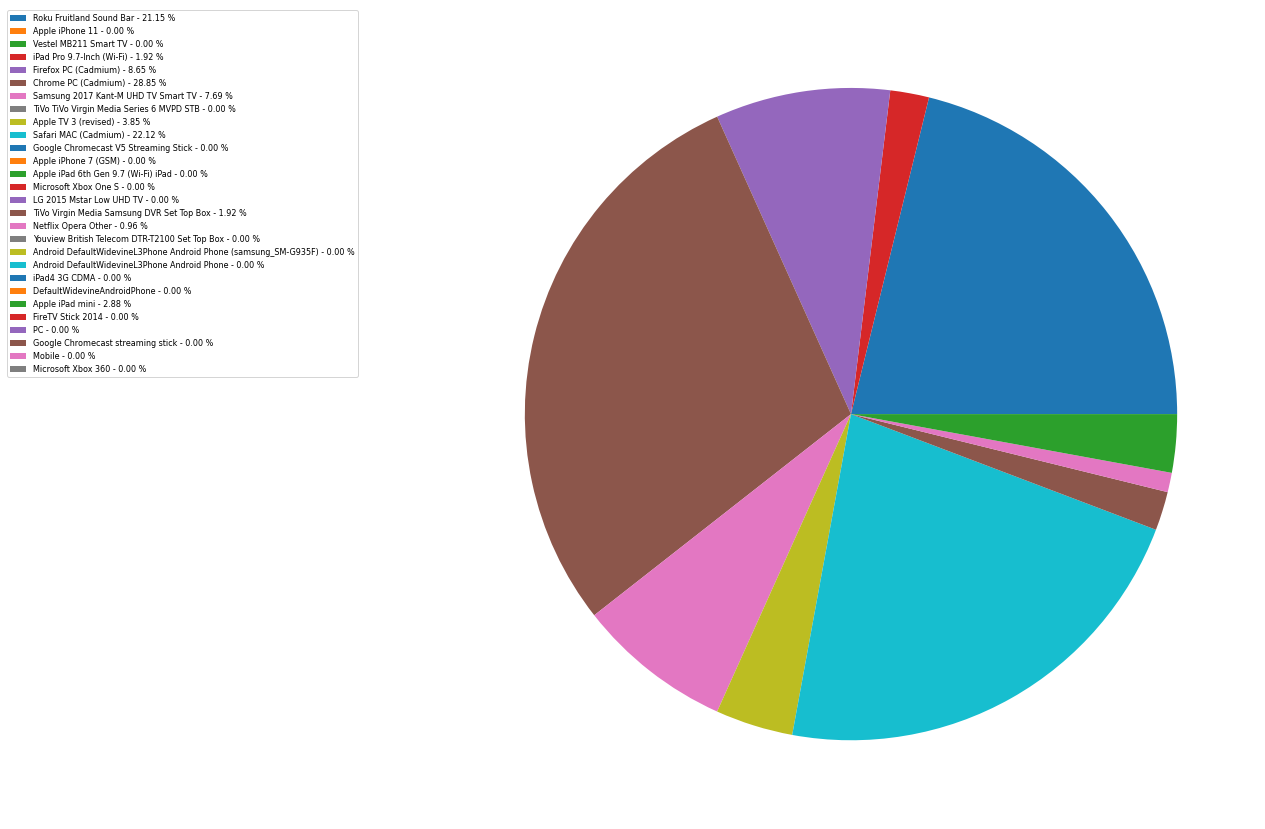

In [75]:
data = []
for i in range(len(devices_used)):
    data.append([devices_used[i], df_jack.loc[df_jack['Device Type'] == devices_used[i], 'Duration'].sum().days])

devices_duration =pd.DataFrame(data, columns=['Device Type','Duration'])
ax = devices_duration.plot(kind='pie', y='Duration',labels = None,legend=False,figsize=(15,15))
ax.yaxis.label.set_visible(False)
percent = 100.*devices_duration['Duration']/devices_duration['Duration'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(devices_duration['Device Type'], percent)]
ax.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)


# Countries Watched In

In [76]:
countries_watched = df_jack['Country'].unique()
print(countries_watched)

['GB (United Kingdom)' 'CZ (Czech Republic)' 'ET (Ethiopia)'
 'TZ (Tanzania, United Republic of)' 'CH (Switzerland)' 'FR (France)'
 'AT (Austria)' 'US (United States)']


[['GB (United Kingdom)', 161531.2], ['CZ (Czech Republic)', 584.8333333333334], ['ET (Ethiopia)', 2.65], ['TZ (Tanzania, United Republic of)', 37.96666666666667], ['CH (Switzerland)', 1.2833333333333334], ['FR (France)', 346.25], ['AT (Austria)', 17.716666666666665], ['US (United States)', 59.68333333333333]]


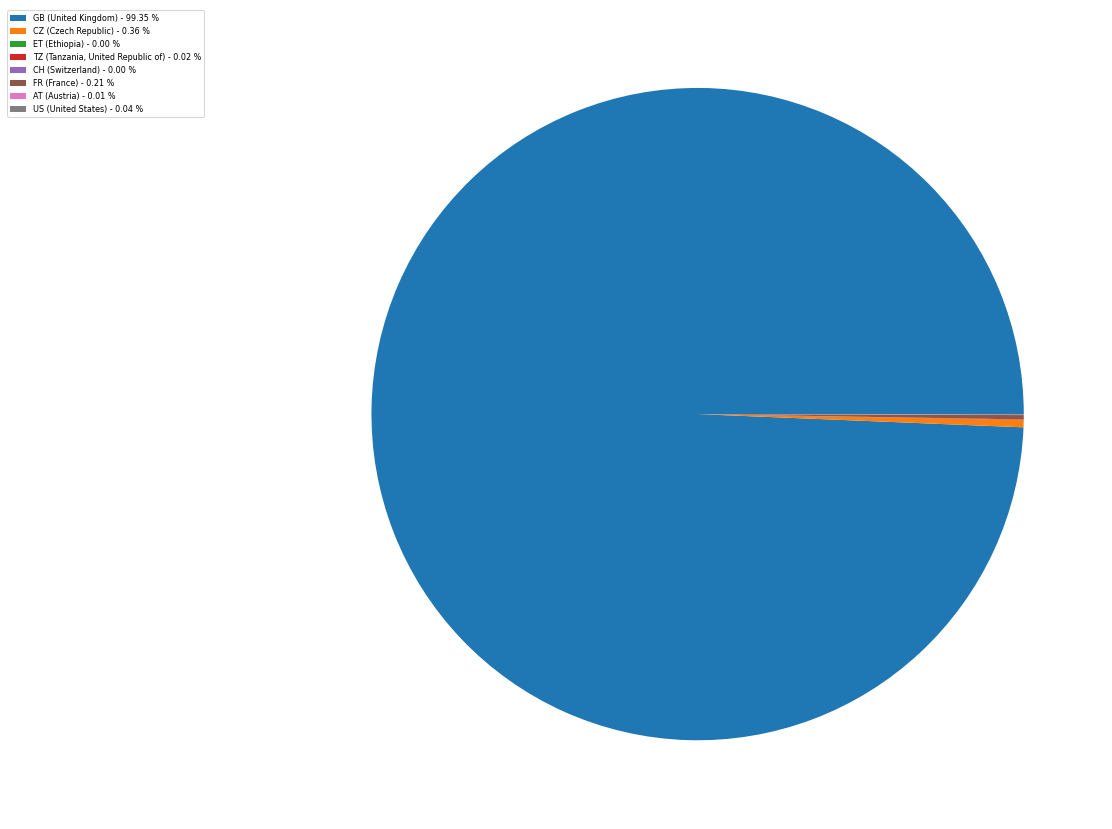

In [92]:
data = []
for i in range(len(countries_watched)):
    mins = df_jack.loc[df_jack['Country'] == countries_watched[i], 'Duration'].sum().days*60*24 + df_jack.loc[df_jack['Country'] == countries_watched[i], 'Duration'].sum().seconds/60
    data.append([countries_watched[i], mins])
print(data)
countries_duration = pd.DataFrame(data, columns=['Countries','Duration'])
ax = countries_duration.plot(kind='pie', y='Duration',labels = None,legend=False,figsize=(15,15))
ax.yaxis.label.set_visible(False)
percent = 100.*countries_duration['Duration']/countries_duration['Duration'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(countries_duration['Countries'], percent)]
ax.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)

In [224]:
import pycountry
import geopandas
import mapclassify
def alpha3code(column):
    CODE=[]
    for country in column:
        country = country[4:-1]
        #print(country)
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)        
        except:
            try: 
                code=pycountry.countries.get(official_name=country).alpha_3
            # .alpha_3 means 3-letter country code 
            # .alpha_2 means 2-letter country code
                CODE.append(code)
            except:
                CODE.append('None')
        
    return CODE

In [177]:
countries_duration['CODE'] = alpha3code(countries_duration['Countries']) 

In [218]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge = pd.merge(world, countries_duration, 'outer',on='CODE')
merge['Countries'] = merge['name']
merge['Duration'] = merge['Duration'].fillna(0)
merge.head(10)

,pop_est,continent,name,CODE,gdp_md_est,geometry,Countries,Duration
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0.000000
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,37.966667
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,0.000000
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.000000
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,59.683333
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,0.000000
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,0.000000
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,0.000000
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,0.000000
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,0.000000


In [219]:
location = pd.read_csv('useful_data/average-latitude-longitude-countries.csv')
merge = merge.merge(location, 'outer',on='name')
merge.head(10)

,pop_est,continent,name,CODE,gdp_md_est,geometry,Countries,Duration,2Code,Latitude,Longitude
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0.000000,FJ,-18.0,175.0
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,37.966667,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,0.000000,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.000000,CA,60.0,-95.0
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,59.683333,NaN,NaN,NaN
5,18513930.0,Asia,Kazakhstan,KAZ,181665.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,0.000000,KZ,48.0,68.0
6,33580650.0,Asia,Uzbekistan,UZB,57921.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,0.000000,UZ,41.0,64.0
7,8776109.0,Oceania,Papua New Guinea,PNG,24829.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,0.000000,PG,-6.0,147.0
8,270625568.0,Asia,Indonesia,IDN,1119190.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,0.000000,ID,-5.0,120.0
9,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,0.000000,AR,-34.0,-64.0


Text(0.5, 1.0, 'World Map of Countries that Jack has Watched Netflix in')

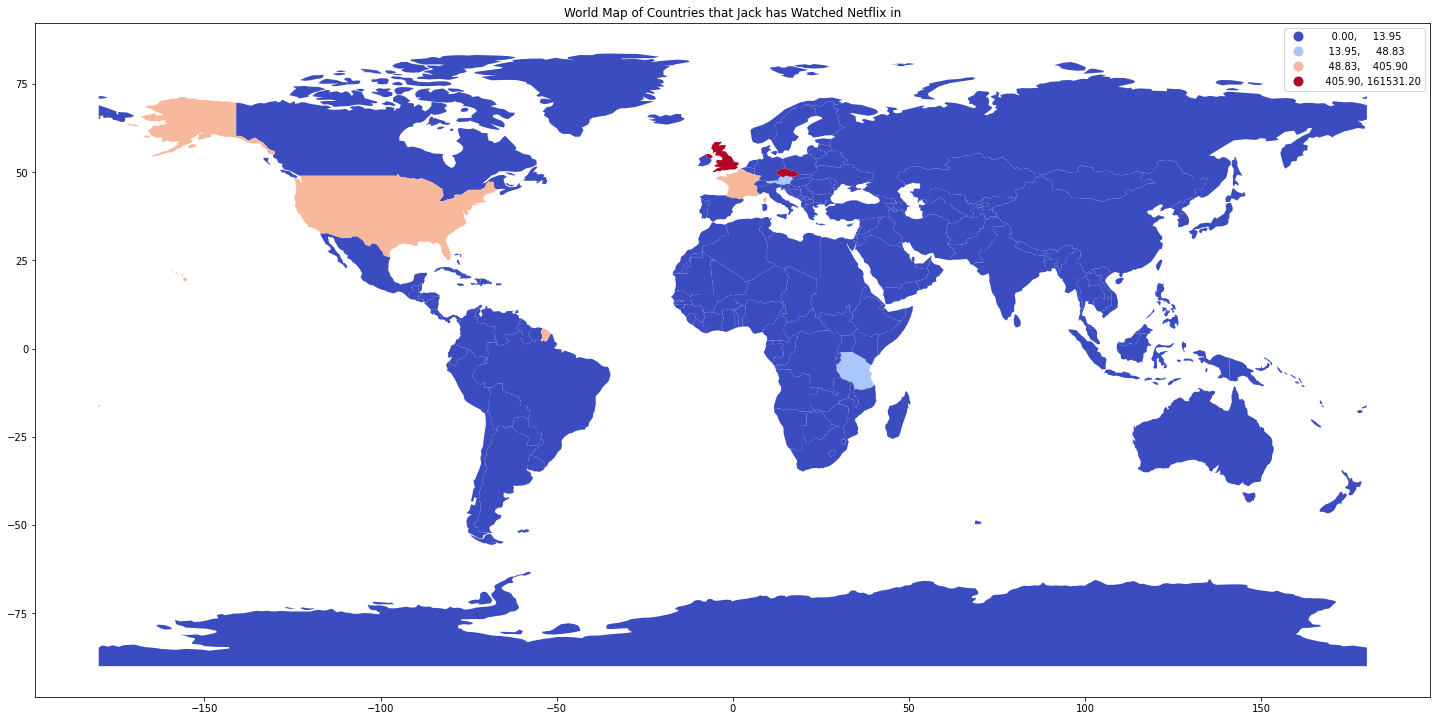

In [230]:
bins = mapclassify.Quantiles(countries_duration['Duration'], k=4).bins
ax = merge.plot(column='Duration',scheme="User_Defined",
           figsize=(25, 20),
           legend=True,cmap='coolwarm',classification_kwds=dict(bins=bins))
ax.set_title("World Map of Countries that Jack has Watched Netflix in")

